Google Colab OpenCV Sürümleri Değiştirme

In [ ]:
#only run if use google colab
!pip install opencv-contrib-python==3.4.2.17
# opencv version 4.5.2.52
!pip show opencv-python
!pip show opencv-contrib-python

Import Modules

In [1]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

import os
import pickle
import requests
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import walk

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage.transform import resize
from skimage.io import imread
from io import BytesIO
from PIL import Image
import cv2

Google Drive for Colab

In [ ]:
#GoogleDrive for colab
from google.colab import drive
drive.mount('/content/drive')

Özellik seçtirme

In [3]:
# seçilecek özellik çıkartma algoritması
secim_feature= input("Hangi Feature aracı kullanılacak? \n 1-SIFT \n 2-SURF \n 3-ORB \n Sayı şeklinde giriniz: ")


Hangi Feature aracı kullanılacak? 
 1-SIFT 
 2-SURF 
 3-ORB 
 Sayı şeklinde giriniz: 1


# **GORSELLERI OKUMA, DUZENLEME, ÖZELLİK ÇIKARTMA**

Fotografları Düzenlemek için fonksiyon
Özellik çıkartmak için fonksiyonlar if kontrolünde çalışıyor


In [4]:

siniflar=['cars','ice_cream_cone','cricket_ball']

datadir="/content/drive/MyDrive/Colab Notebooks/generalProject/DatasetForImageClassification/"

ham_veriler=[] 
sonuclanacak=[]

def get_descriptors_extractor(image):
               
        if secim_feature=='1':
            sift = cv2.xfeatures2d.SIFT_create()
            keypoints_sift, descriptorsEx = sift.detectAndCompute(image, None)
            img_xfeature = cv2.drawKeypoints(image, keypoints_sift, None)
            return img_xfeature

        elif secim_feature=='2':
            surf = cv2.xfeatures2d.SURF_create()
            keypoints_surf, descriptorsEx = surf.detectAndCompute(image, None)
            img_xfeature = cv2.drawKeypoints(image, keypoints_surf, None)
            return img_xfeature

        elif secim_feature=='3':
            orb = cv2.ORB_create(nfeatures=1500)
            keypoints_orb, descriptorsEx = orb.detectAndCompute(image, None)
            img_xfeature = cv2.drawKeypoints(image, keypoints_orb, None)
            return img_xfeature
        

def img_editor(imgs,url_control):
    
    if url_control == True:
        img_array = cv2.imread(imgs, cv2.IMREAD_GRAYSCALE)
    else:
        img_array = cv2.imread(os.path.join(path,imgs), cv2.IMREAD_GRAYSCALE)

    dim= (200,150)
    img_resized = cv2.resize(img_array, dim)

    return img_resized

#ilk for ile her kategoriyi tarıyorum, ikinci for ile içindeki resimleri resize ve flat edip listeye atıyorum
for sinif in siniflar:
    path=os.path.join(datadir,sinif)
    for img in os.listdir(path):
        #img_array=imread(os.path.join(path,img))
        
        img_rs = img_editor(img,False)
        descripts_array = get_descriptors_extractor(img_rs)
        ham_veriler.append(descripts_array.flatten())
        sonuclanacak.append(siniflar.index(sinif))

# numpy array convert
duzenli_veriler=np.array(ham_veriler) 
sonuc=np.array(sonuclanacak)
df=pd.DataFrame(duzenli_veriler)

df['Sonuc']=sonuc

Splitting

In [5]:
# veri dizimi train için iloc ediyorum
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# klasik train_test_split işlemi
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Test ve Eğitim verileri ayrıştırıldı')

Test ve Eğitim verileri ayrıştırıldı


Öğrenme Algoritmasının Seçimi

In [6]:
# Secilecek makine öğrenmesi algoritması
secim_algorithm= input("Hangi öğrenme algoritması kullanılacak? \n 1-SVM \n 2-LogisticRegression \n 3-Decision Trees \n Sayı şeklinde giriniz: ")


Hangi öğrenme algoritması kullanılacak? 
 1-SVM 
 2-LogisticRegression 
 3-Decision Trees 
 Sayı şeklinde giriniz: 2


Seçilen Algoritmaya göre 'model' değişkenine atama

In [7]:
if secim_algorithm=='1':

    grid_parametreleri={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
    #search_VC=svm.SVC(probability=True)
    #model=GridSearchCV(search_VC,grid_parametreleri)
    model=svm.SVC(C=0.1, gamma=0.0001, kernel='poly', probability=True)
    algorithm_explain="Support Vector Machines"

if secim_algorithm=='2':
     
     grid = {'penalty' : ['l1', 'l2'],'C' : np.logspace(-3,-4,4,3,20),'solver' : ['liblinear']}
     #regress=LogisticRegression(max_iter=2500)
     #model=GridSearchCV(regress,grid,cv=5)
     model=LogisticRegression(penalty='l1',C=4,solver='liblinear',max_iter=2500)
     algorithm_explain="Logistic Regression"

if secim_algorithm=='3':

    param_dtree = [{'max_depth':np.arange(3, 15),'max_features':[1,2,4,6,8],'criterion':['gini','entropy']}]
    model=DecisionTreeClassifier(criterion='gini', max_depth=9, max_features=8)
    algorithm_explain="Decision Tree Classifier"

Model Fitting

In [8]:

#fit
print("Model eğitim işlemi başladı lütfen bekleyiniz... Tahmini: 10 dakika")
model.fit(x_train,y_train)
print("Model eğitim işlemi bitti!")

#print("En iyi parametreler")
#print(model.best_params_)
#print(model.best_estimator_)

y_prediction=model.predict(x_test)
print(f"Modelin doğruluk oranı: {accuracy_score(y_prediction,y_test)*100}% ")

#cross val
#cv_results = cross_validate(model, x, y, cv=5)
#print("cross val"+cv_results['test_score'])

Model eğitim işlemi başladı lütfen bekleyiniz... Tahmini: 10 dakika
Model eğitim işlemi bitti!
Modelin doğruluk oranı: 60.0% 


PICKLE ile kaydetme

In [10]:
# modeli PICKLE ile diske kaydediyorum
pick = open('/content/drive/MyDrive/Colab Notebooks/generalProject/siniflama_model.p','wb')
pickle.dump(model,pick)
pick.close()
print("Model Dosyası Oluşturuldu!")

Model Dosyası Oluşturuldu!


URL ile resim indirilip kaydediliyor.

In [11]:
# modeli çağırıyorum
model=pickle.load(open('/content/drive/MyDrive/Colab Notebooks/generalProject/siniflama_model.p','rb'))

# tahmin edilecek resim giriliyor
url_img_path = "/content/drive/MyDrive/Colab Notebooks/generalProject/url_image_test.jpg"
test_image_folder = "/content/drive/MyDrive/Colab Notebooks/generalProject"

# eğer deneme resmi varsa siler
filenames = next(walk(test_image_folder), (None, None, None, []))[2]

if 'url_image_test.jpg' in filenames :
    os.remove(url_img_path)
    print("Eski yuklenmis resim silindi.. ")

# tahmin edilecek resmi kaydeder
url=input('Resim URLsi Giriniz: ')

img = Image.open(BytesIO(requests.get(url).content))
img.save(url_img_path)

img_url = url_img_path

Eski yuklenmis resim silindi.. 
Resim URLsi Giriniz: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSt9KsQEpIxxX59NVMv5rOqzhqmfQEhJXZJxBuLu22_nBFExh5SQ-aBD-ljLioJWSrnsn8&usqp=CAU


Resimler gösteriliyor

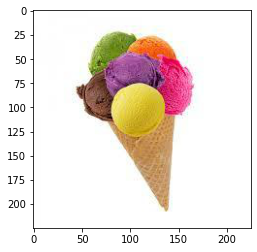

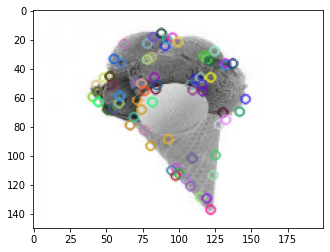

In [12]:
#normal resim show
plt.imshow(imread(img_url))
plt.show()

#özellik çıkartılmış resim show
img_url_rs = img_editor(img_url,True)
descripts_array = get_descriptors_extractor(img_url_rs)

plt.imshow(descripts_array,cmap='gist_earth')
plt.show()

Modelin test edilmesi, tahmin skorlarının yazdırılması

In [13]:

deneme_resim=[descripts_array.flatten()]
tahmin=model.predict_proba(deneme_resim)

for ind,cesit in enumerate(siniflar):
  print(f'{cesit} = {tahmin[0][ind]*100}%')
print("Tahmin edilen : "+ siniflar[model.predict(deneme_resim)[0]])

if secim_feature=='1':
    feature_explain="SIFT"
elif secim_feature=='2':
    feature_explain="SURE"
elif secim_feature=='3':
    feature_explain="ORB"

print(feature_explain,"\n"+algorithm_explain)

cars = 0.0073733437239086%
ice_cream_cone = 99.96656821643896%
cricket_ball = 0.026058439837135756%
Tahmin edilen : ice_cream_cone
SIFT 
Logistic Regression
